Loading Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
df = pd.read_csv('data_all.csv')

# Select columns B to U as features and V as target
feature_columns = df.columns[1:21]  # Columns B to U
target_column = df.columns[21]  # Column V (FloodProbability)
data = df[feature_columns.tolist() + [target_column]]

In [2]:
data.shape

(1863262, 21)

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print("1. Basic Data Exploration")
print(data.info())

1. Basic Data Exploration
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863262 entries, 0 to 1863261
Data columns (total 21 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   MonsoonIntensity                 float64
 1   TopographyDrainage               float64
 2   RiverManagement                  float64
 3   Deforestation                    float64
 4   Urbanization                     float64
 5   ClimateChange                    float64
 6   DamsQuality                      float64
 7   Siltation                        float64
 8   AgriculturalPractices            float64
 9   Encroachments                    float64
 10  IneffectiveDisasterPreparedness  float64
 11  DrainageSystems                  float64
 12  CoastalVulnerability             float64
 13  Landslides                       float64
 14  Watersheds                       float64
 15  DeterioratingInfrastructure      float64
 16  PopulationScore             

In [5]:
print("\nSample data:")
print(data.head())


Sample data:
   MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0          0.039335            1.467011         0.020654       1.489348   
1          0.525633            0.989450        -0.461971      -0.459918   
2          0.525633            0.034328         0.503280       1.002031   
3         -0.933262           -0.443233         0.503280       0.027398   
4          0.039335           -0.920793        -1.427222       0.514715   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0      0.508518      -0.453698    -0.458827  -0.932697              -0.938761   
1      1.468781       1.489614    -0.938314   0.034964              -0.455784   
2     -0.931878       1.003786    -1.897287   0.034964              -0.455784   
3     -0.451746       1.489614    -0.458827   1.002626               0.510172   
4     -0.451746      -0.453698    -0.938314  -0.932697              -0.938761   

   Encroachments  IneffectiveDisasterPreparednes

In [6]:
print("\nData description:")
print(data.describe())


Data description:
       MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      1.863262e+06        1.863262e+06     1.863262e+06   1.863262e+06   
mean       1.938750e-16        1.223273e-16    -1.801047e-16   1.083206e-16   
std        1.000000e+00        1.000000e+00     1.000000e+00   1.000000e+00   
min       -2.392157e+00       -2.353476e+00    -2.392472e+00  -2.409185e+00   
25%       -9.332621e-01       -9.207935e-01    -4.619709e-01  -4.599185e-01   
50%        3.933451e-02        3.432829e-02     2.065439e-02   2.739809e-02   
75%        5.256328e-01        5.118892e-01     5.032797e-01   5.147147e-01   
max        5.388616e+00        6.242620e+00     5.329533e+00   5.875197e+00   

       Urbanization  ClimateChange   DamsQuality     Siltation  \
count  1.863262e+06   1.863262e+06  1.863262e+06  1.863262e+06   
mean   9.382574e-17  -2.863889e-17 -2.833382e-18  2.252176e-16   
std    1.000000e+00   1.000000e+00  1.000000e+00  1.000000e+00   
min  

In [4]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (if needed)

# Step 2: Count missing values in each column
missing_values = data.isnull().sum()

# Step 3: Display the missing values for each column
print("\nmissing_values:")
print(missing_values)


missing_values:
MonsoonIntensity                        0
TopographyDrainage                      0
RiverManagement                         0
Deforestation                           0
Urbanization                            0
ClimateChange                           0
DamsQuality                             0
Siltation                               0
AgriculturalPractices                   0
Encroachments                           0
IneffectiveDisasterPreparedness         0
DrainageSystems                         0
CoastalVulnerability                    0
Landslides                              0
Watersheds                              0
DeterioratingInfrastructure             0
PopulationScore                         0
WetlandLoss                             0
InadequatePlanning                      0
PoliticalFactors                        0
FloodProbability                   745305
dtype: int64


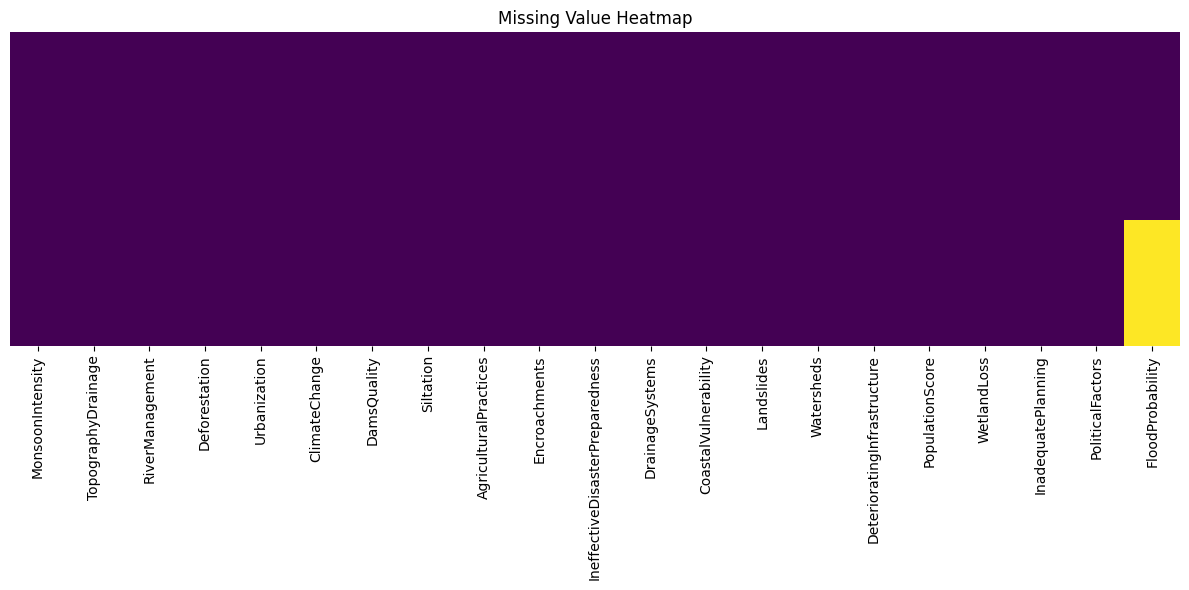

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Value Heatmap')
plt.tight_layout()
plt.show()


3. Distribution Analysis


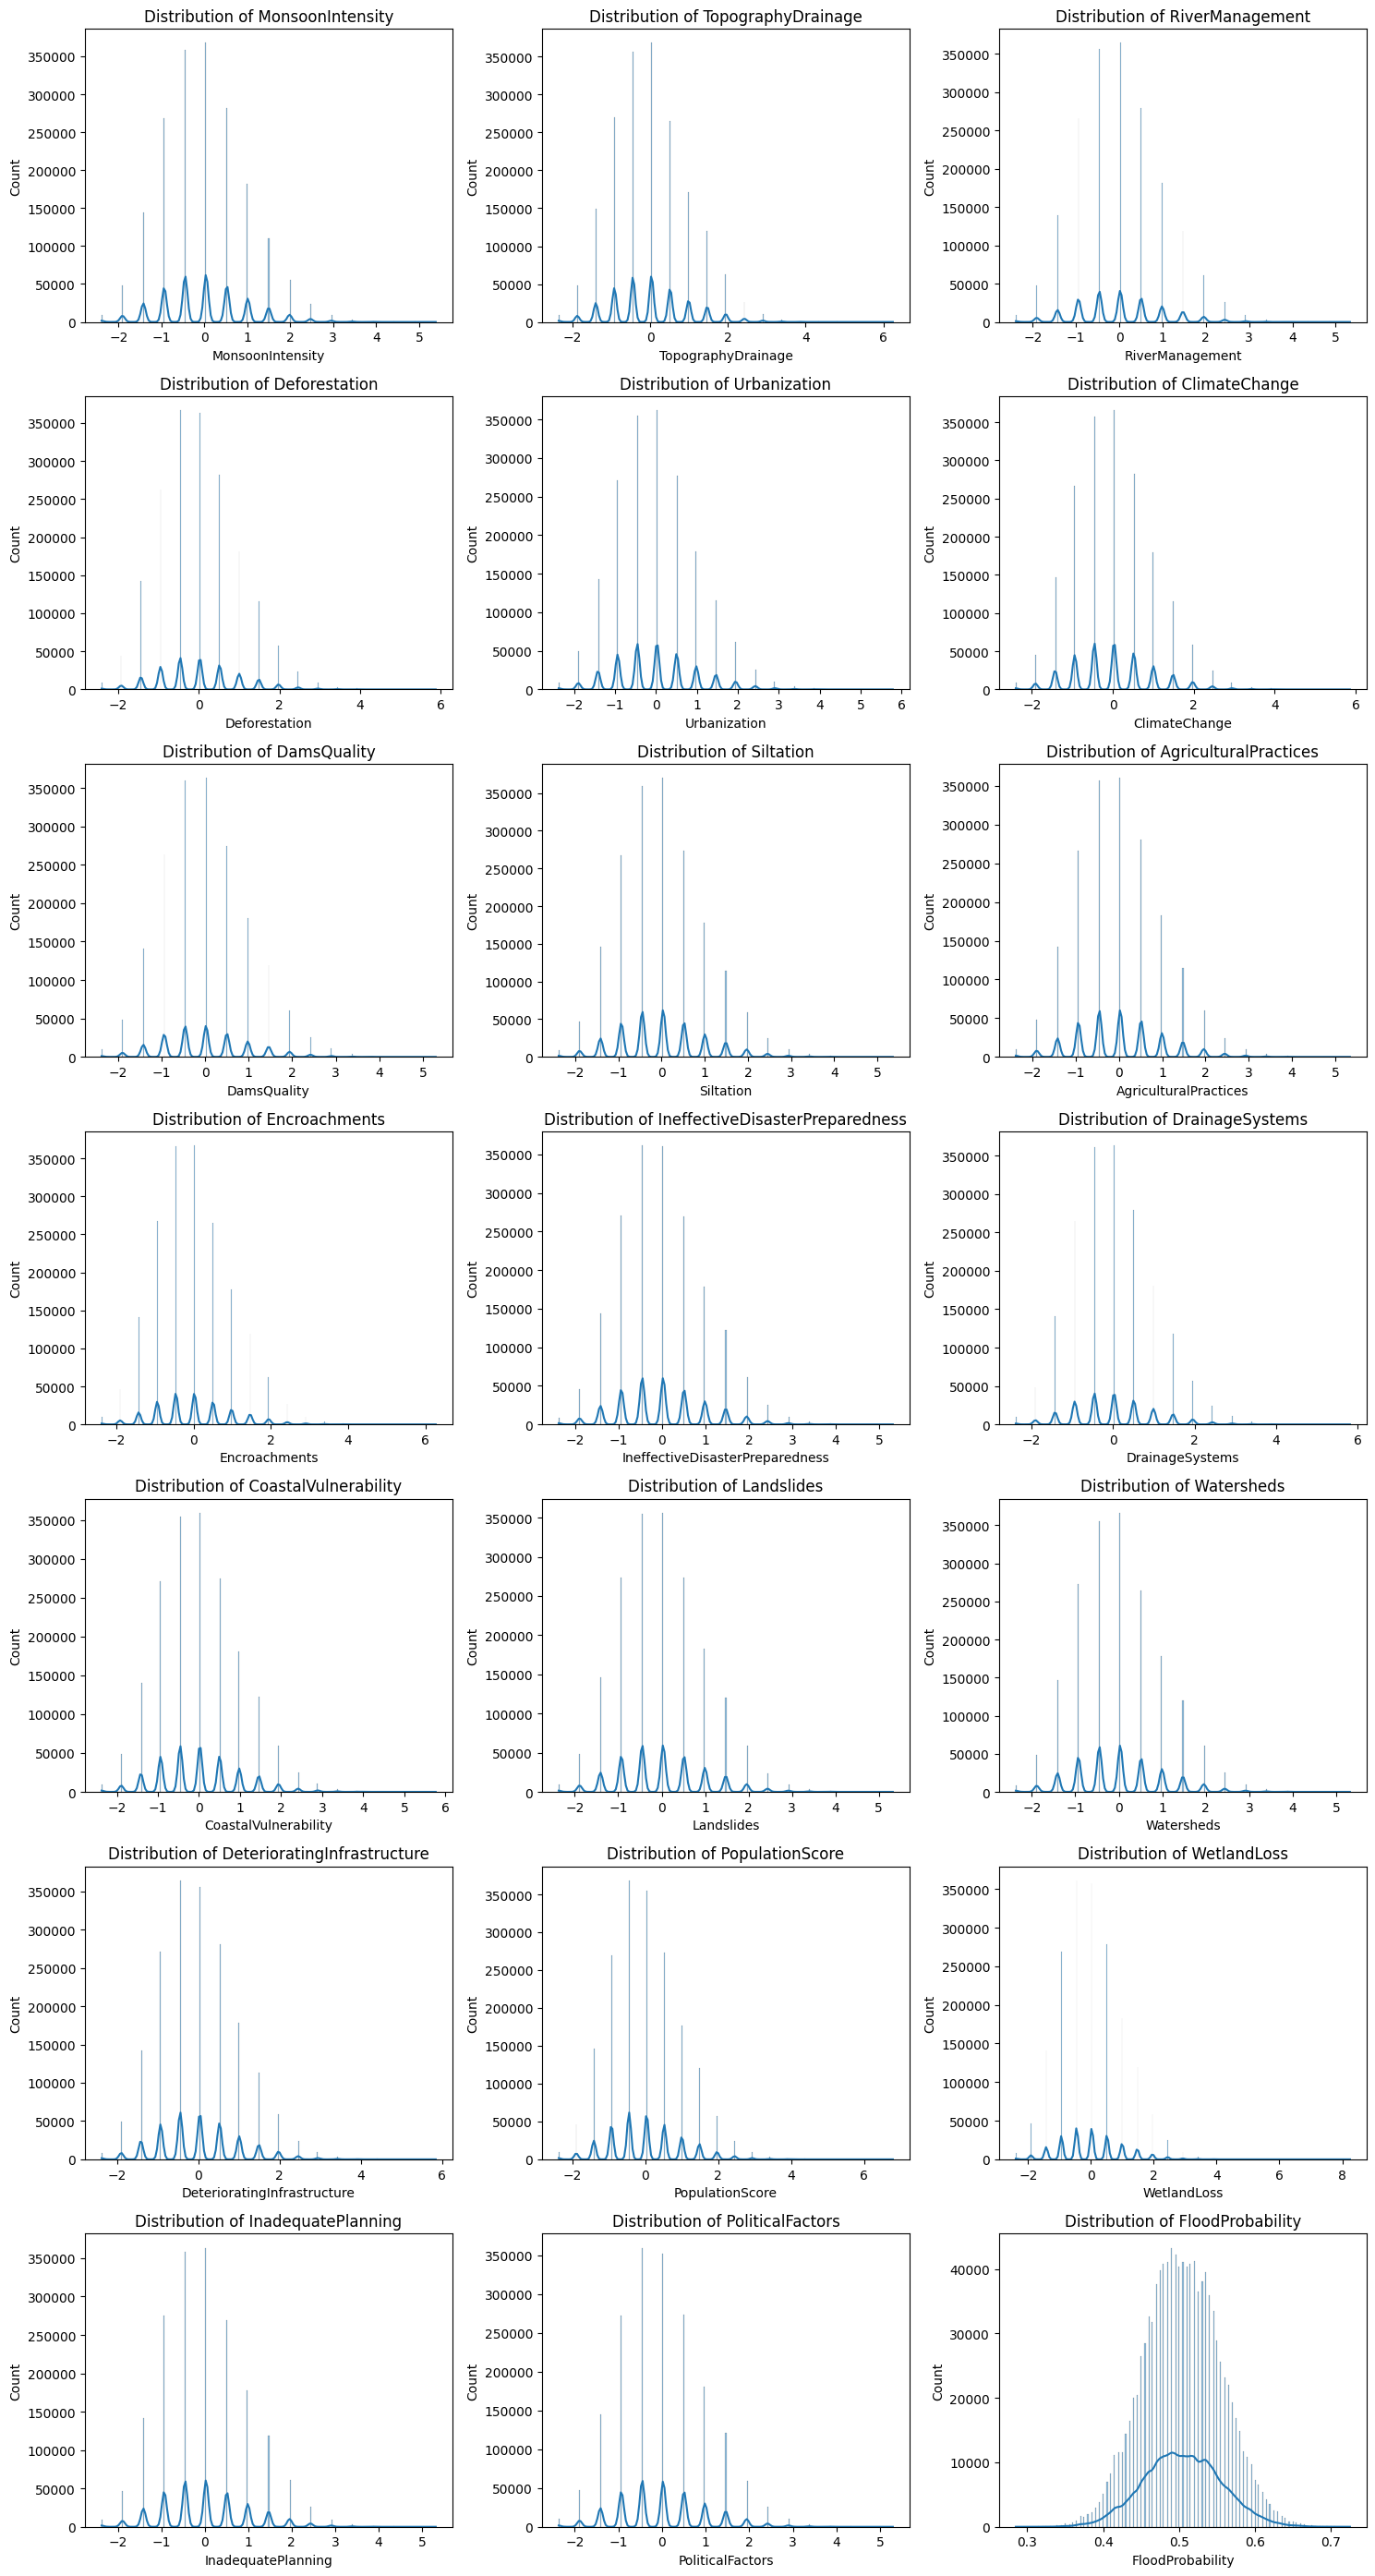

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of columns for the grid
n_cols = 3  # You can change this based on how many plots per row you want
n_rows = (len(data.columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Create a figure to hold all plots
plt.figure(figsize=(n_cols * 5, n_rows * 4))  # Adjust the size based on your preference

print("\n3. Distribution Analysis")
for i, column in enumerate(data.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()


In [9]:
# # 4. Correlation Analysis
# print("\n4. Correlation Analysis")
# correlation_matrix = data.corr()

# plt.figure(figsize=(20, 16))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Heatmap of Flood Prediction Features')
# plt.tight_layout()
# plt.show()

Before Dropping FloodProbability


<Axes: >

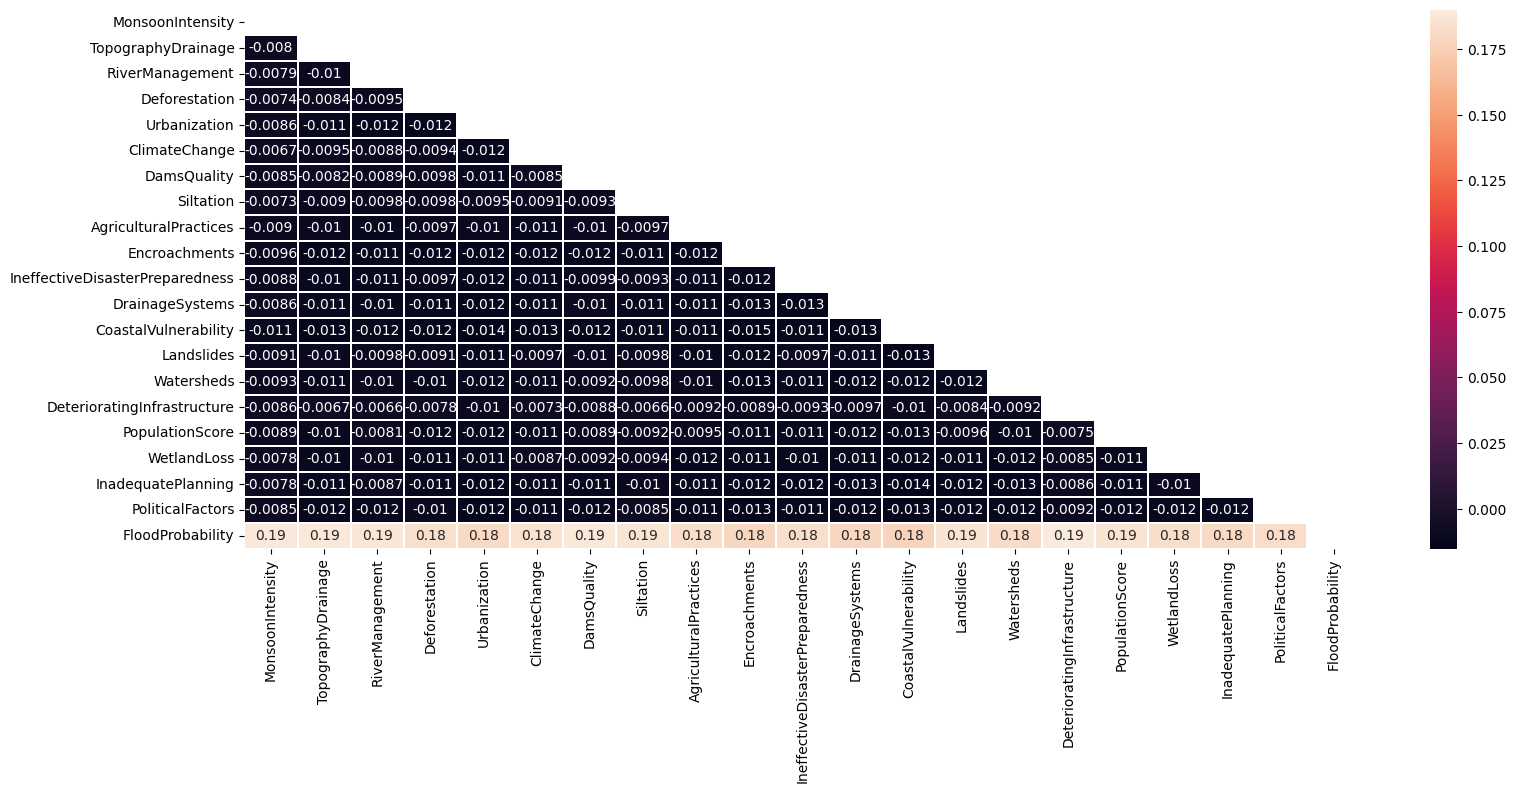

In [10]:
import numpy as np
print('Before Dropping FloodProbability')
plt.figure(figsize=(18,7))
correlation_matrix = data.corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, mask = mask,linewidth=0.1 ,annot=True)

After Dropping FloodProbability


<Axes: >

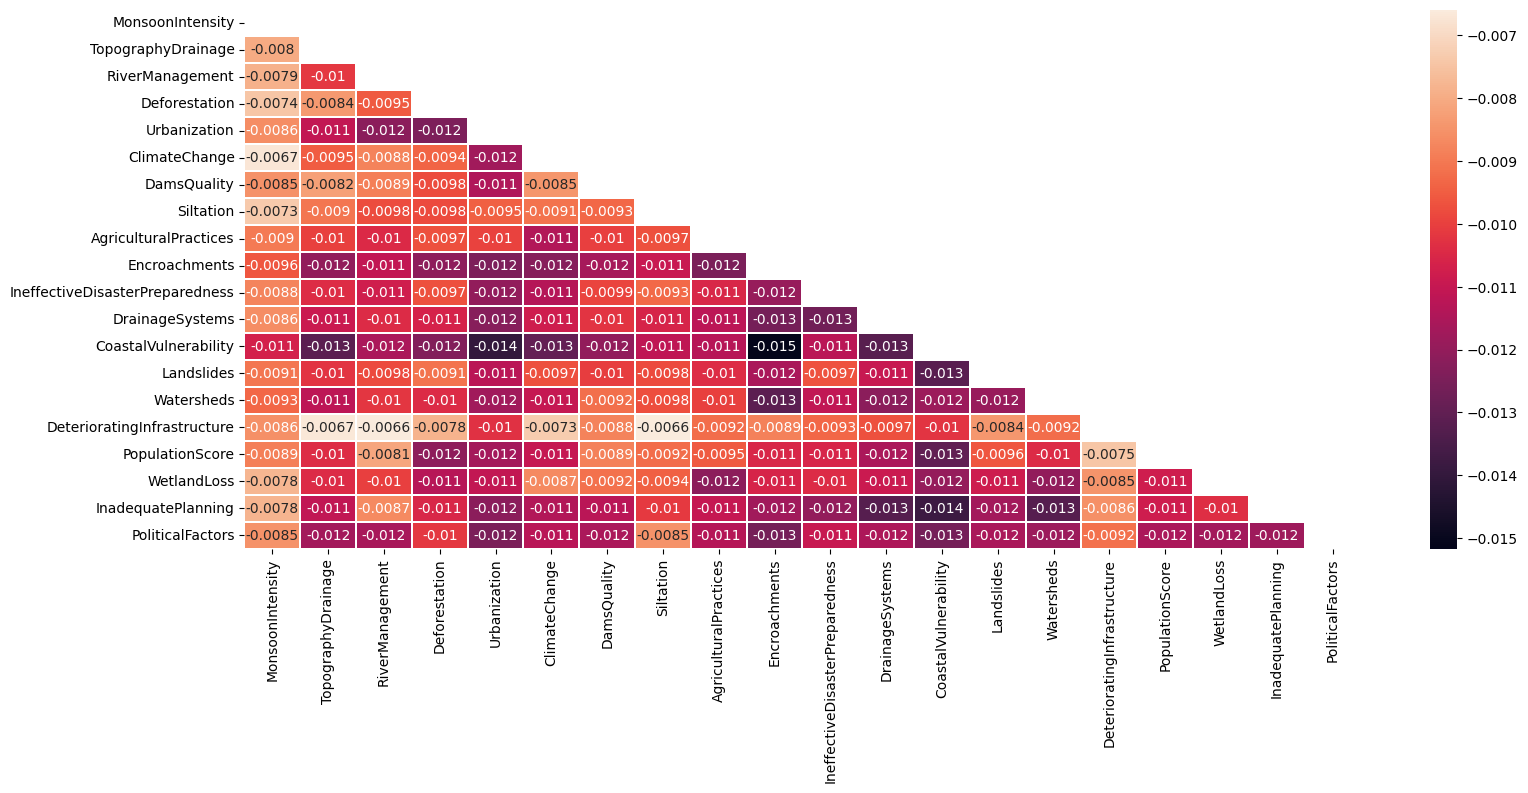

In [11]:
print('After Dropping FloodProbability')
plt.figure(figsize=(18,7))
corr = data.drop('FloodProbability', axis=1).corr()
mask = np.triu(corr)
sns.heatmap(corr, mask = mask,linewidth=0.1 ,annot=True)

In [12]:
print("\nFeature Importance")
# Correlation-based feature importance
correlation_importance = abs(correlation_matrix[target_column]).sort_values(ascending=False)
print("Correlation-based Feature Importance:")
print(correlation_importance)


Feature Importance
Correlation-based Feature Importance:
FloodProbability                   1.000000
DeterioratingInfrastructure        0.190007
MonsoonIntensity                   0.189098
DamsQuality                        0.187996
TopographyDrainage                 0.187635
RiverManagement                    0.187131
Siltation                          0.186789
PopulationScore                    0.185890
Landslides                         0.185346
ClimateChange                      0.184761
Deforestation                      0.184001
WetlandLoss                        0.183396
AgriculturalPractices              0.183366
IneffectiveDisasterPreparedness    0.183109
PoliticalFactors                   0.182417
Watersheds                         0.181907
InadequatePlanning                 0.180968
Urbanization                       0.180861
DrainageSystems                    0.179305
Encroachments                      0.178841
CoastalVulnerability               0.177774
Name: FloodProbabi

Scatter Plot for top 4 important Features and Related Visualizations

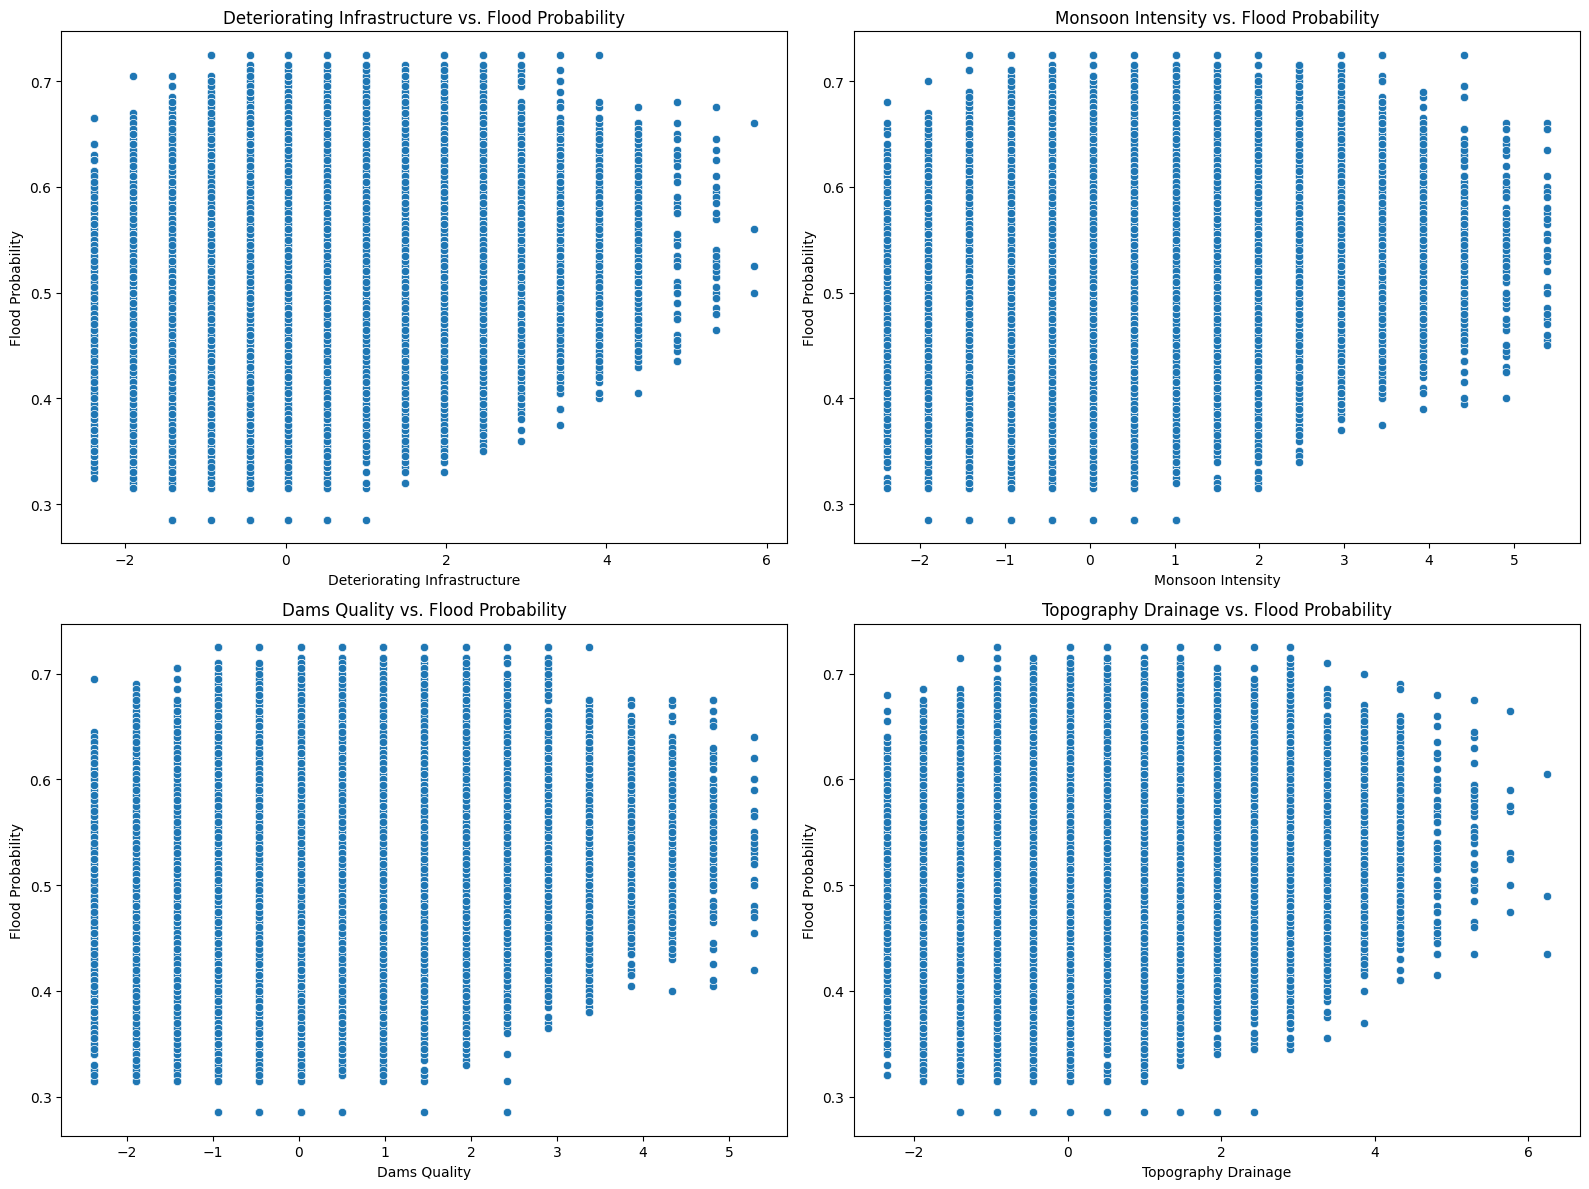

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 2 rows and 2 columns (for 4 subplots)
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Deteriorating Infrastructure vs Flood Probability
sns.scatterplot(x='DeterioratingInfrastructure', y='FloodProbability', data=data, ax=axs[0, 0])
axs[0, 0].set_title('Deteriorating Infrastructure vs. Flood Probability')
axs[0, 0].set_xlabel('Deteriorating Infrastructure')
axs[0, 0].set_ylabel('Flood Probability')

# Plot 2: Monsoon Intensity vs Flood Probability
sns.scatterplot(x='MonsoonIntensity', y='FloodProbability', data=data, ax=axs[0, 1])
axs[0, 1].set_title('Monsoon Intensity vs. Flood Probability')
axs[0, 1].set_xlabel('Monsoon Intensity')
axs[0, 1].set_ylabel('Flood Probability')

# Plot 3: Dams Quality vs Flood Probability
sns.scatterplot(x='DamsQuality', y='FloodProbability', data=data, ax=axs[1, 0])
axs[1, 0].set_title('Dams Quality vs. Flood Probability')
axs[1, 0].set_xlabel('Dams Quality')
axs[1, 0].set_ylabel('Flood Probability')

# Plot 4: Topography Drainage vs Flood Probability
sns.scatterplot(x='TopographyDrainage', y='FloodProbability', data=data, ax=axs[1, 1])
axs[1, 1].set_title('Topography Drainage vs. Flood Probability')
axs[1, 1].set_xlabel('Topography Drainage')
axs[1, 1].set_ylabel('Flood Probability')

# Adjust layout
plt.tight_layout()
plt.show()



7. Box Plots


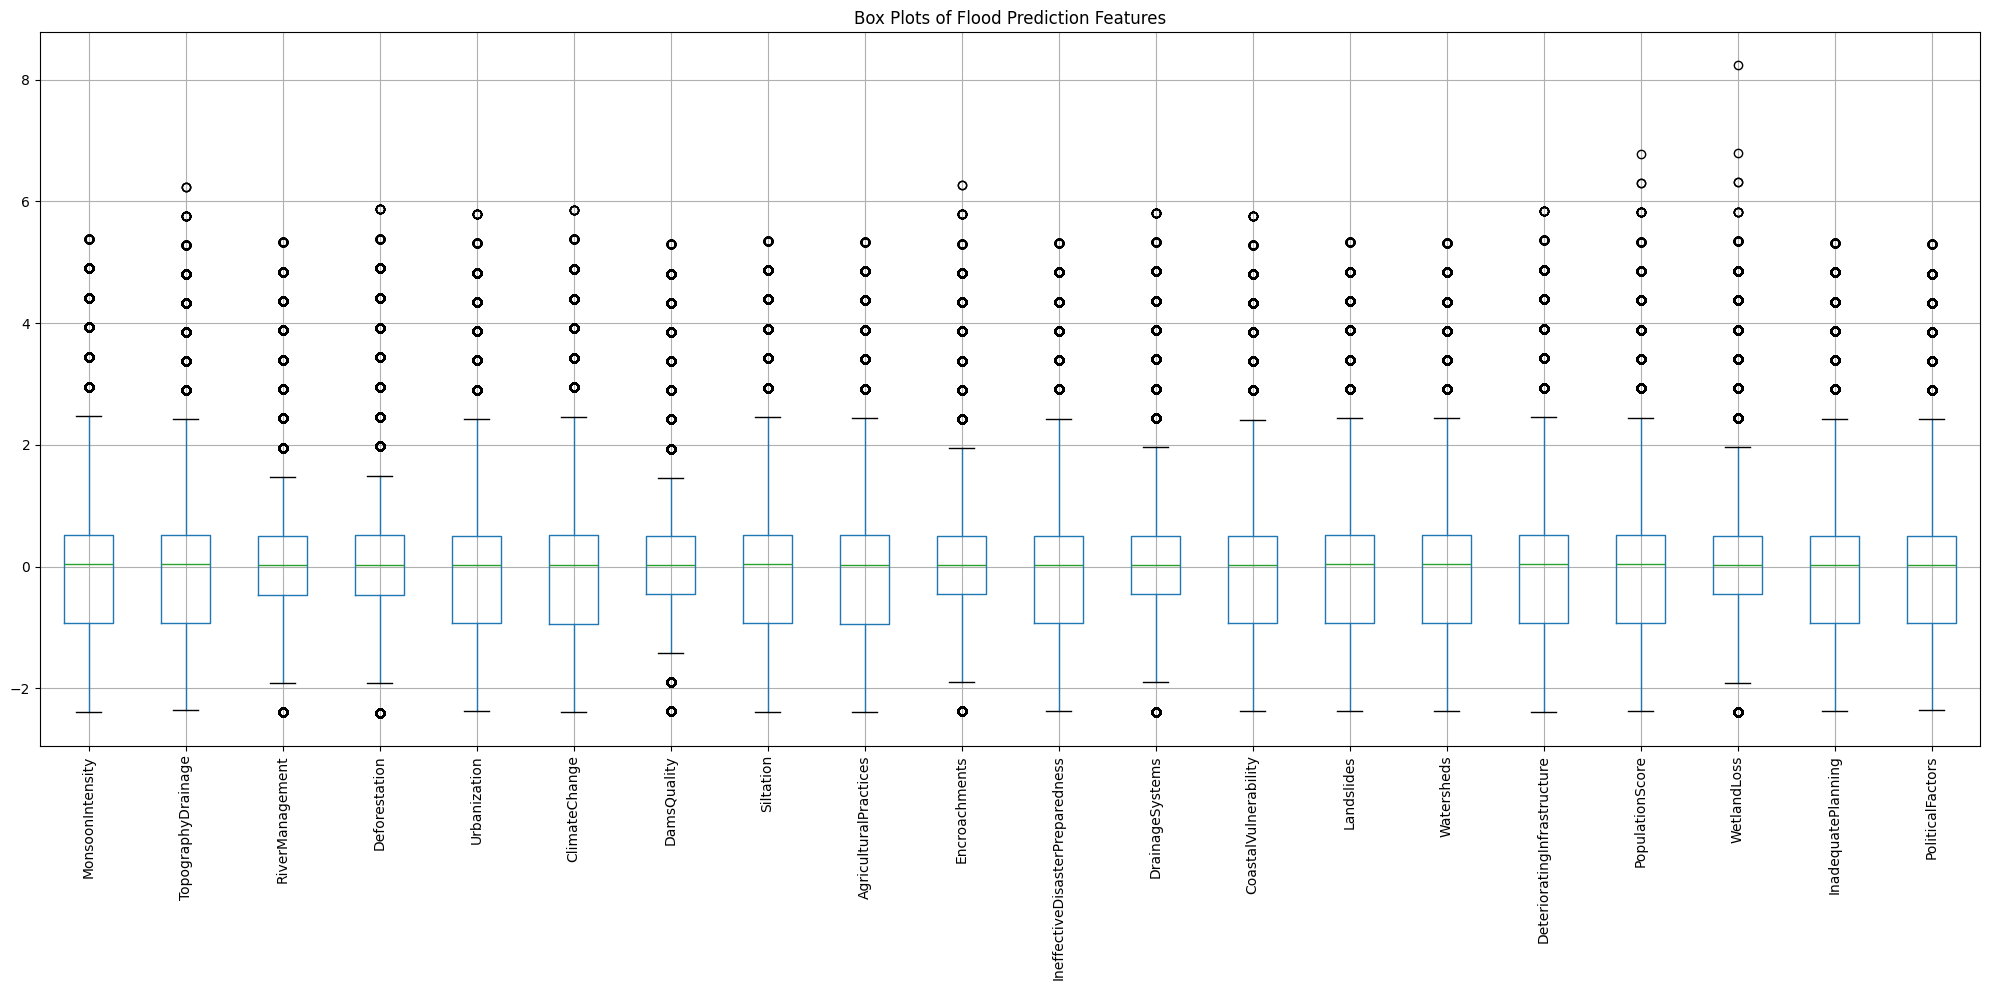

In [14]:
print("\n7. Box Plots")
plt.figure(figsize=(20, 10))
data[feature_columns].boxplot()
plt.title('Box Plots of Flood Prediction Features')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Interaction between important features

C:\Users\adity\AppData\Local\Temp\ipykernel_6604\3220286428.py:20: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\adity\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


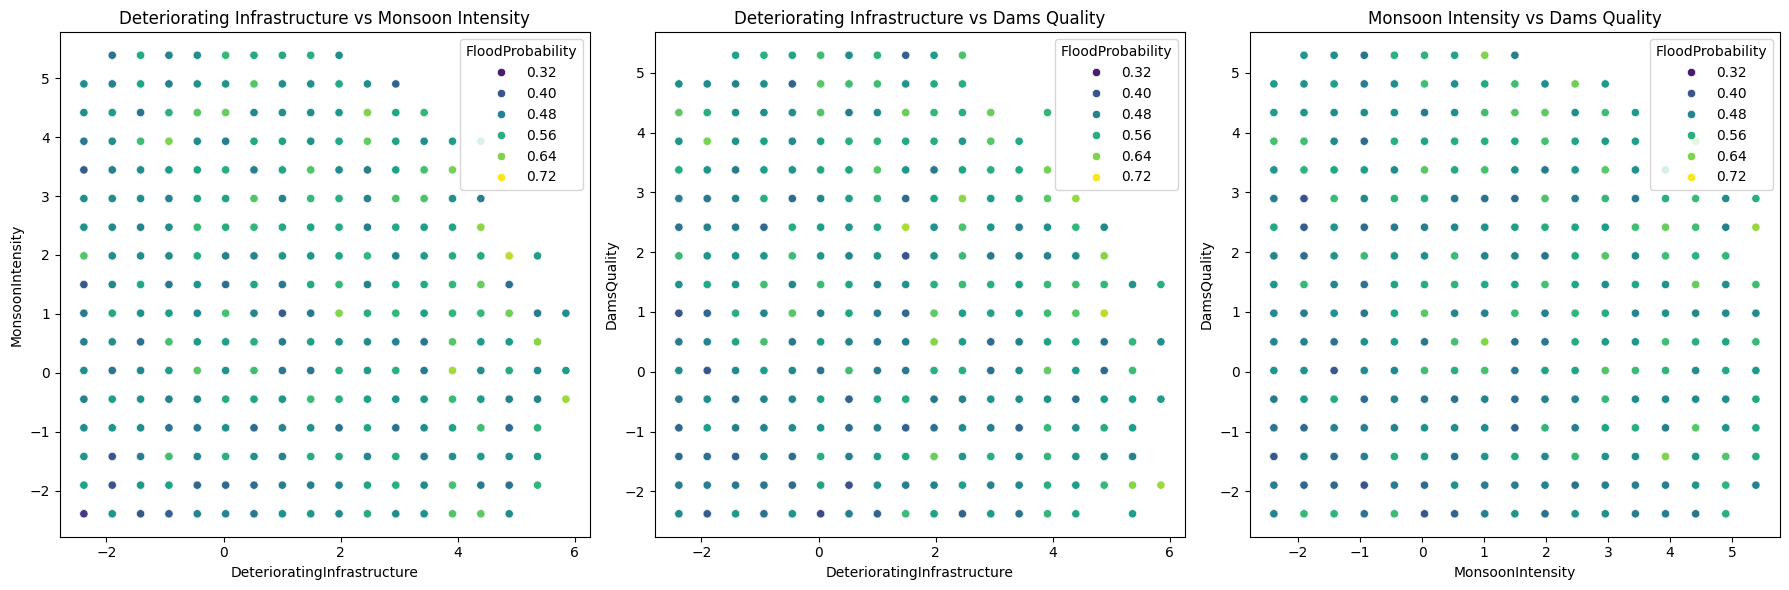

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with 3 subplots in 1 row
fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns

# Plot 1: Deteriorating Infrastructure vs Monsoon Intensity
sns.scatterplot(x='DeterioratingInfrastructure', y='MonsoonIntensity', hue=target_column, data=data, palette='viridis', ax=axs[0])
axs[0].set_title('Deteriorating Infrastructure vs Monsoon Intensity')

# Plot 2: Deteriorating Infrastructure vs Dams Quality
sns.scatterplot(x='DeterioratingInfrastructure', y='DamsQuality', hue=target_column, data=data, palette='viridis', ax=axs[1])
axs[1].set_title('Deteriorating Infrastructure vs Dams Quality')

# Plot 3: Monsoon Intensity vs Dams Quality
sns.scatterplot(x='MonsoonIntensity', y='DamsQuality', hue=target_column, data=data, palette='viridis', ax=axs[2])
axs[2].set_title('Monsoon Intensity vs Dams Quality')

# Adjust the layout
plt.tight_layout()
plt.show()



Feature Distribution by Flood Probability


C:\Users\adity\AppData\Local\Temp\ipykernel_6604\3431661171.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FloodProbabilityBin'] = pd.qcut(data[target_column], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])


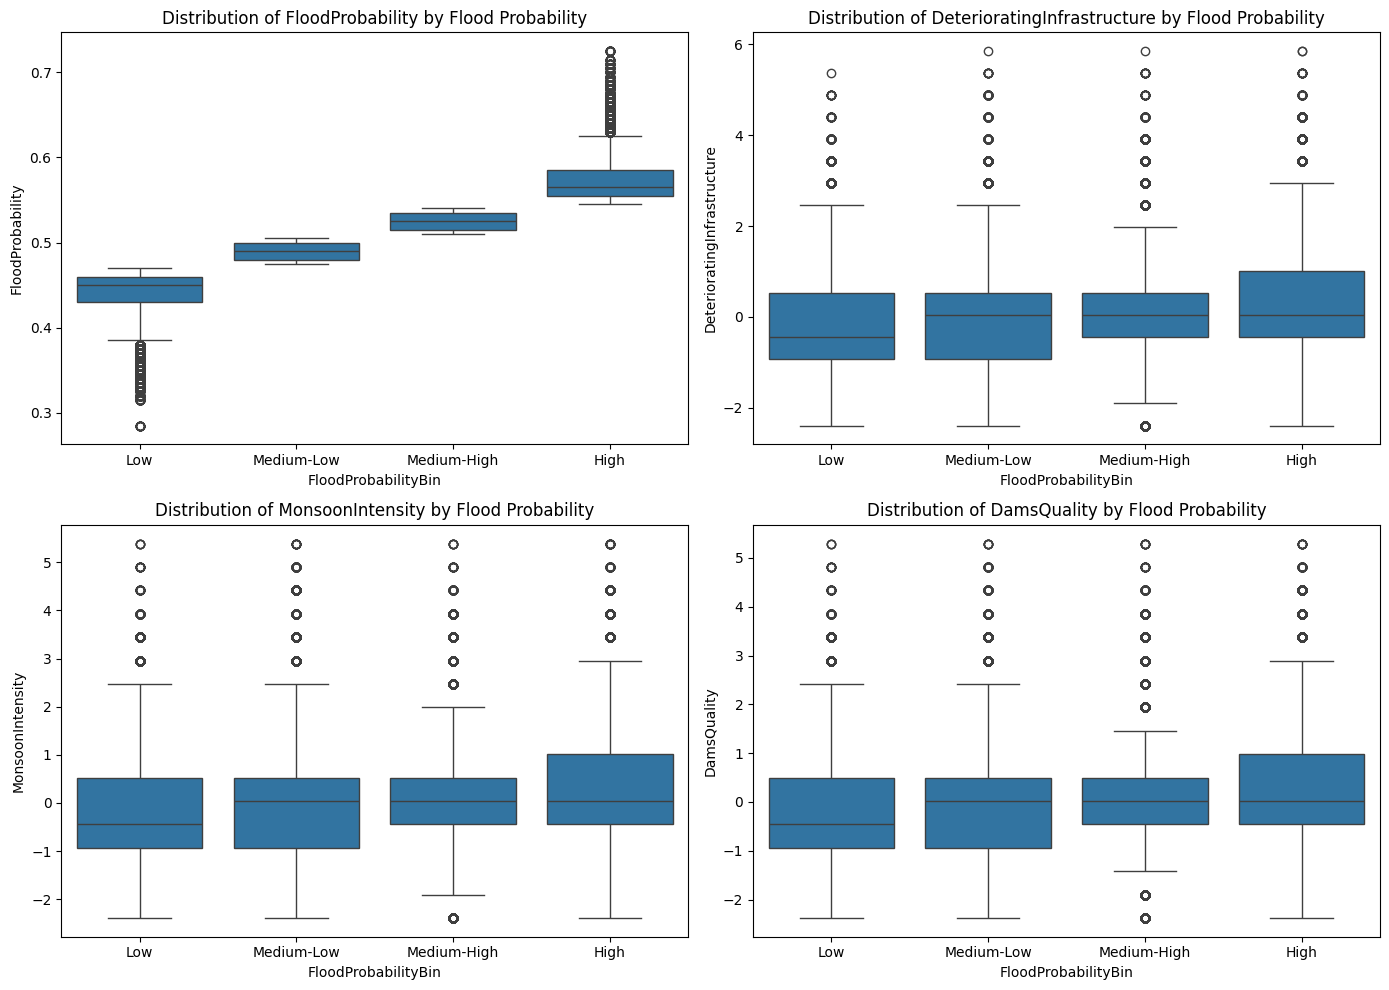

In [16]:
print("\nFeature Distribution by Flood Probability")
data['FloodProbabilityBin'] = pd.qcut(data[target_column], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

# Create a 2x2 grid for the subplots
plt.figure(figsize=(14, 10))

# First subplot - FloodProbability distribution
plt.subplot(2, 2, 1)
sns.boxplot(x='FloodProbabilityBin', y='FloodProbability', data=data)
plt.title('Distribution of FloodProbability by Flood Probability')

# Second subplot - DeterioratingInfrastructure distribution
plt.subplot(2, 2, 2)
sns.boxplot(x='FloodProbabilityBin', y='DeterioratingInfrastructure', data=data)
plt.title('Distribution of DeterioratingInfrastructure by Flood Probability')

# Third subplot - MonsoonIntensity distribution
plt.subplot(2, 2, 3)
sns.boxplot(x='FloodProbabilityBin', y='MonsoonIntensity', data=data)
plt.title('Distribution of MonsoonIntensity by Flood Probability')

# Fourth subplot - DamsQuality distribution
plt.subplot(2, 2, 4)
sns.boxplot(x='FloodProbabilityBin', y='DamsQuality', data=data)
plt.title('Distribution of DamsQuality by Flood Probability')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show the combined plot
plt.show()


In [17]:
print(df.head())

   id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0          0.039335            1.467011         0.020654       1.489348   
1   1          0.525633            0.989450        -0.461971      -0.459918   
2   2          0.525633            0.034328         0.503280       1.002031   
3   3         -0.933262           -0.443233         0.503280       0.027398   
4   4          0.039335           -0.920793        -1.427222       0.514715   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0      0.508518      -0.453698    -0.458827  -0.932697              -0.938761   
1      1.468781       1.489614    -0.938314   0.034964              -0.455784   
2     -0.931878       1.003786    -1.897287   0.034964              -0.455784   
3     -0.451746       1.489614    -0.458827   1.002626               0.510172   
4     -0.451746      -0.453698    -0.938314  -0.932697              -0.938761   

   Encroachments  IneffectiveDisasterP

In [18]:
df.shape

(1863262, 75)

Data Cleaning

In [5]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (if needed)

# Step 2: Count missing values in each column
missing_values = data.isnull().sum()

# Step 3: Display the missing values for each column
print(missing_values)

MonsoonIntensity                        0
TopographyDrainage                      0
RiverManagement                         0
Deforestation                           0
Urbanization                            0
ClimateChange                           0
DamsQuality                             0
Siltation                               0
AgriculturalPractices                   0
Encroachments                           0
IneffectiveDisasterPreparedness         0
DrainageSystems                         0
CoastalVulnerability                    0
Landslides                              0
Watersheds                              0
DeterioratingInfrastructure             0
PopulationScore                         0
WetlandLoss                             0
InadequatePlanning                      0
PoliticalFactors                        0
FloodProbability                   745305
dtype: int64


In [6]:
df_cleaned = data.dropna()

# Step 4: Display the shape of the original and cleaned DataFrames
print(f"Original shape: {data.shape}")
print(f"Shape after removing missing values: {df_cleaned.shape}")

# Optional: Display the cleaned DataFrame (first few rows)
df_cleaned.head()

Original shape: (1863262, 21)
Shape after removing missing values: (1117957, 21)


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0.039335,1.467011,0.020654,1.489348,0.508518,-0.453698,-0.458827,-0.932697,-0.938761,-0.456037,-1.416803,0.026184,-0.936056,-0.928460,0.033750,-0.448380,0.999385,0.024238,0.990022,-0.929064,0.445
1,0.525633,0.989450,-0.461971,-0.459918,1.468781,1.489614,-0.938314,0.034964,-0.455784,0.504258,1.949532,0.991280,-1.414787,-2.371757,-0.926508,0.035848,-0.929273,-0.943079,-0.452061,-0.929064,0.450
2,0.525633,0.034328,0.503280,1.002031,-0.931878,1.003786,-1.897287,0.034964,-0.455784,0.024110,0.506817,0.991280,-0.936056,0.995936,0.033750,0.520076,1.481549,-1.426738,-0.932756,-0.929064,0.530
3,-0.933262,-0.443233,0.503280,0.027398,-0.451746,1.489614,-0.458827,1.002626,0.510172,1.464552,0.025912,-1.421459,-0.457324,0.995936,-0.446379,-0.448380,0.517220,0.024238,0.990022,0.028255,0.535
4,0.039335,-0.920793,-1.427222,0.514715,-0.451746,-0.453698,-0.938314,-0.932697,-0.938761,-0.936185,0.025912,-1.421459,-1.414787,0.514837,0.513878,-0.448380,-1.893602,-1.426738,-0.932756,0.028255,0.415


In [7]:
missing_values = df_cleaned.isnull().sum()

# Step 3: Display the missing values for each column
print(missing_values)

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


Feature Engineering

In [9]:
secondLast_column = 'FloodProbability' 
# Last_column = 'FloodProbabilityBin'
# dropcol_1="IneffectiveDisasterPreparedness"
# dropcol_2="DrainageSystems"
X = df_cleaned.drop(columns=[secondLast_column])
y = df_cleaned[secondLast_column]

In [10]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
np.save("X_TRAIN.npy",X_train)
np.save("X_TEST.npy",X_test)
np.save("Y_TRAIN.npy",y_train)
np.save("Y_TEST.npy",y_test)
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)

# X_test_scaled = scaler.transform(X_test)

In [24]:
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

# Step 10: Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# on train set
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)

# Step 11: Print the evaluation metrics
print("For training set:-----")
print(f"Mean Squared Error: {mse_train}")
print(f"Mean absolute Error: {mae_train}")
print(f"R-squared: {r2_train}")
print(f"root Mean Squared Error: {rmse_train}")

print("------------------------------------------")

print("For testing set:-----")
print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {mae}")
print(f"R-squared: {r2}")
print(f"root Mean Squared Error: {rmse}")

For training set:-----
Mean Squared Error: 0.0004038208228442378
Mean absolute Error: 0.015815270118558773
R-squared: 0.8449678970613
root Mean Squared Error: 0.020095293549591102
------------------------------------------
For testing set:-----
Mean Squared Error: 0.0004032065870905579
Mean absolute Error: 0.01579247136376023
R-squared: 0.8448773362840329
root Mean Squared Error: 0.02008000465862889


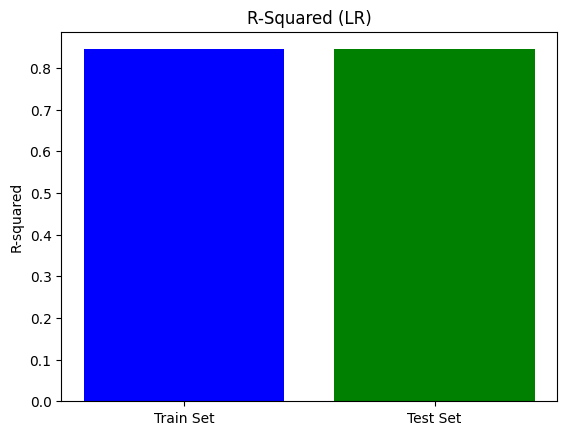

In [25]:
r2_scores = [r2_train, r2]
labels = ['Train Set', 'Test Set']

plt.bar(labels, r2_scores, color=['blue', 'green'])
plt.title('R-Squared (LR)')
plt.ylabel('R-squared')
plt.show()

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

In [ ]:
# # Train the Decision Tree Regressor
# DTS_model = DecisionTreeRegressor()
# DTS_model.fit(X_train, y_train)

# # Predictions on the test set
# y_pred_test_DFT = DTS_model.predict(X_test)

# # Predictions on the train set
# y_pred_train_DFT = DTS_model.predict(X_train)

# # Test set metrics
# mse_test_DFT = mean_squared_error(y_test, y_pred_test_DFT)
# mae_test_DFT = mean_absolute_error(y_test, y_pred_test_DFT)
# r2_test_DFT = r2_score(y_test, y_pred_test_DFT)
# rmse_test_DFT = np.sqrt(mse_test_DFT)

# # Train set metrics
# mse_train_DFT = mean_squared_error(y_train, y_pred_train_DFT)
# mae_train_DFT = mean_absolute_error(y_train, y_pred_train_DFT)
# r2_train_DFT = r2_score(y_train, y_pred_train_DFT)
# rmse_train_DFT = np.sqrt(mse_train_DFT)

# # Print the test set metrics
# print("Test Set Metrics for Decision Tree Regressor:")
# print(f"Mean Squared Error (Test): {mse_test_DFT}")
# print(f"Mean Absolute Error (Test): {mae_test_DFT}")
# print(f"R-squared (Test): {r2_test_DFT}")
# print(f"Root Mean Squared Error (Test): {rmse_test_DFT}")
# # 
# print("-------------------------------------------------")
# # Print the train set metrics
# print("\nTrain Set Metrics for Decision Tree Regressor:")
# print(f"Mean Squared Error (Train): {mse_train_DFT}")
# print(f"Mean Absolute Error (Train): {mae_train_DFT}")
# print(f"R-squared (Train): {r2_train_DFT}")
# print(f"Root Mean Squared Error (Train): {rmse_train_DFT}")


Test Set Metrics for Decision Tree Regressor:
Mean Squared Error (Test): 0.002455117468424631
Mean Absolute Error (Test): 0.03945554849905185
R-squared (Test): 0.0554609631114612
Root Mean Squared Error (Test): 0.04954914195447416
-------------------------------------------------

Train Set Metrics for Decision Tree Regressor:
Mean Squared Error (Train): 2.270894637148148e-35
Mean Absolute Error (Train): 4.0226056602145877e-19
R-squared (Train): 1.0
Root Mean Squared Error (Train): 4.765390474187974e-18


In [28]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
scaler = StandardScaler()
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2']  # Corrected values
}

# Create Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    estimator=dt_regressor,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best model
best_dt = grid_search.best_estimator_

# Predictions
y_train_pred = best_dt.predict(X_train)
y_test_pred = best_dt.predict(X_test)

# Evaluation Metrics
print("Best Parameters:", grid_search.best_params_)
print("\nTraining Set Metrics:")
print("Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Mean Absolute Error:", mean_absolute_error(y_train, y_train_pred))
print("R-squared:", r2_score(y_train, y_train_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("\nTesting Set Metrics:")
print("Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_test_pred))
print("R-squared:", r2_score(y_test, y_test_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'min_samples_split': 15}

Training Set Metrics:
Mean Squared Error: 0.0013828548408835908
Mean Absolute Error: 0.029825658764238264
R-squared: 0.46910391462443746
Root Mean Squared Error: 0.037186756256543683

Testing Set Metrics:
Mean Squared Error: 0.001813339369845602
Mean Absolute Error: 0.03418918283148939
R-squared: 0.30236746551884397
Root Mean Squared Error: 0.04258332267268023


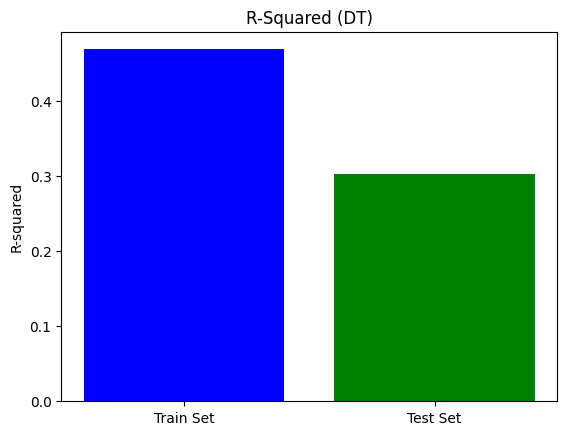

In [29]:
r2_scores = [r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)]
labels = ['Train Set', 'Test Set']

plt.bar(labels, r2_scores, color=['blue', 'green'])
plt.title('R-Squared (DT)')
plt.ylabel('R-squared')
plt.show()

In [30]:
# Train the Random Forest Regressor
RFs_model = RandomForestRegressor()
RFs_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_test_RF = RFs_model.predict(X_test)

# Predictions on the train set
y_pred_train_RF = RFs_model.predict(X_train)

# Test set metrics
mse_test_RF = mean_squared_error(y_test, y_pred_test_RF)
mae_test_RF = mean_absolute_error(y_test, y_pred_test_RF)
r2_test_RF = r2_score(y_test, y_pred_test_RF)
rmse_test_RF = np.sqrt(mse_test_RF)

# Train set metrics
mse_train_RF = mean_squared_error(y_train, y_pred_train_RF)
mae_train_RF = mean_absolute_error(y_train, y_pred_train_RF)
r2_train_RF = r2_score(y_train, y_pred_train_RF)
rmse_train_RF = np.sqrt(mse_train_RF)

# Print the test set metrics
print("Test Set Metrics for Random Forest Regressor:")
print(f"Mean Squared Error (Test): {mse_test_RF}")
print(f"Mean Absolute Error (Test): {mae_test_RF}")
print(f"R-squared (Test): {r2_test_RF}")
print(f"Root Mean Squared Error (Test): {rmse_test_RF}")

# Print the train set metrics
print("\nTrain Set Metrics for Random Forest Regressor:")
print(f"Mean Squared Error (Train): {mse_train_RF}")
print(f"Mean Absolute Error (Train): {mae_train_RF}")
print(f"R-squared (Train): {r2_train_RF}")    
print(f"Root Mean Squared Error (Train): {rmse_train_RF}")


Test Set Metrics for Random Forest Regressor:
Mean Squared Error (Test): 0.0008946284509508393
Mean Absolute Error (Test): 0.024457641149951706
R-squared (Test): 0.6558162669192331
Root Mean Squared Error (Test): 0.029910340201188608

Train Set Metrics for Random Forest Regressor:
Mean Squared Error (Train): 0.00012693768034583236
Mean Absolute Error (Train): 0.009122105795732178
R-squared (Train): 0.9512669619472158
Root Mean Squared Error (Train): 0.011266662342762935


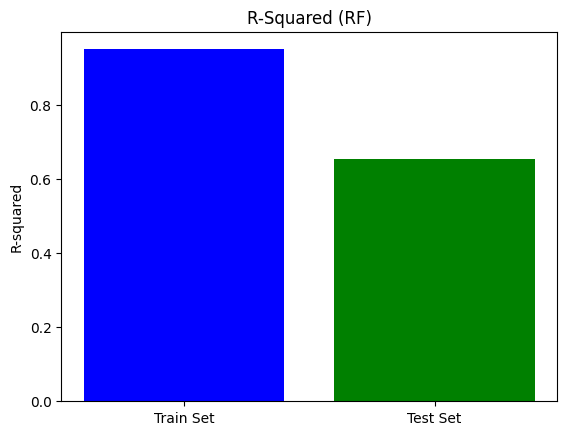

In [31]:
r2_scores = [r2_train_RF, r2_test_RF]
labels = ['Train Set', 'Test Set']

plt.bar(labels, r2_scores, color=['blue', 'green'])
plt.title('R-Squared (RF)')
plt.ylabel('R-squared')
plt.show()

In [33]:
X_train.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
805665,1.498229,0.989450,0.985905,0.514715,-0.451746,-0.939526,3.856552,1.486457,-0.938761,-1.416332,0.025912,0.508732,0.500139,0.514837,0.033750,0.035848,-1.411437,0.507897,-0.452061,0.985575
863045,1.011931,-0.443233,-0.461971,-1.434552,-0.451746,0.032130,0.979632,-0.932697,0.510172,-1.416332,-1.416803,0.508732,0.021407,-2.371757,0.513878,-1.416837,0.035056,-0.459420,-0.932756,-0.450405
496045,0.525633,0.034328,-1.909847,0.514715,0.508518,1.003786,-0.938314,0.034964,0.510172,-0.456037,-0.454993,0.026184,0.978870,0.514837,0.033750,-0.448380,1.963713,-0.943079,0.028633,-0.929064
1079364,-0.446964,0.511889,0.503280,-0.947235,-0.931878,-0.939526,-1.897287,0.034964,-0.455784,0.504258,0.987722,1.956376,0.500139,-1.409559,0.033750,-0.448380,0.999385,0.991556,-0.452061,-1.886384
191800,0.525633,-0.920793,1.468530,-1.434552,0.988650,-0.453698,0.500146,0.518795,0.993149,0.504258,-0.935898,0.026184,-1.414787,0.514837,0.513878,0.035848,0.035056,-0.459420,-0.452061,2.421555


In [34]:
from sklearn.svm import SVR
fraction = 0.2  # 20% of the data

# Downsampling
X_train_sampled = X_train.sample(frac=fraction, random_state=42)
y_train_sampled = y_train.loc[X_train_sampled.index] 

# Create SVM Regressor
svm_model = SVR()

# Fit the model on the downsampled data
svm_model.fit(X_train_sampled, y_train_sampled)

y_pred_train_svm = svm_model.predict(X_train_sampled)

# Predict using the test set (no need to downsample test set)
y_pred_svm = svm_model.predict(X_test)


# Calculate the evaluation metrics
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)

mse_train_svm = mean_squared_error(y_train_sampled, y_pred_train_svm)
mae_train_svm= mean_absolute_error(y_train_sampled, y_pred_train_svm)
r2_train_svm = r2_score(y_train_sampled, y_pred_train_svm)
rmse_train_svm= np.sqrt(mse_train_svm)

# Print the evaluation metrics
print("for test set")
print(f"Mean Squared Error (SVM): {mse_svm}")
print(f"Mean Absolute Error (SVM): {mae_svm}")
print(f"R-squared (SVM): {r2_svm}")
print(f"Root Mean Squared Error (SVM): {rmse_svm}")

print("for training set")
print(f"Mean Squared Error (SVM): {mse_train_svm}")
print(f"Mean Absolute Error (SVM): {mae_train_svm}")
print(f"R-squared (SVM): {r2_train_svm}")
print(f"Root Mean Squared Error (SVM): {rmse_train_svm}")

for test set
Mean Squared Error (SVM): 0.0007799243556316158
Mean Absolute Error (SVM): 0.022302245494701188
R-squared (SVM): 0.6999455182130665
Root Mean Squared Error (SVM): 0.027927125803269046
for training set
Mean Squared Error (SVM): 0.0007753844264310999
Mean Absolute Error (SVM): 0.02226534976981186
R-squared (SVM): 0.7030081936118235
Root Mean Squared Error (SVM): 0.027845725460671697


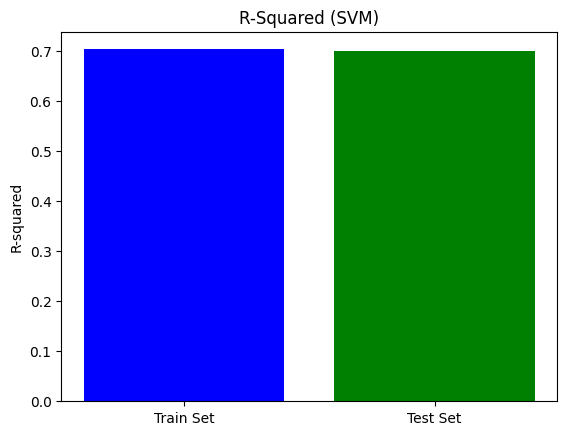

In [35]:
r2_scores = [r2_train_svm, r2_svm]
labels = ['Train Set', 'Test Set']

plt.bar(labels, r2_scores, color=['blue', 'green'])
plt.title('R-Squared (SVM)')
plt.ylabel('R-squared')
plt.show()

In [15]:
from sklearn.neural_network import MLPRegressor

# Create an MLP Regressor model with 2 hidden layers of sizes 64 and 32
mlp_model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=200)

# Train the MLP model
mlp_model.fit(X_train, y_train)

# Predict using the test set
y_pred_mlp = mlp_model.predict(X_test)

# Predict using the train set
y_pred_train_mlp = mlp_model.predict(X_train)

# Calculate the test set evaluation metrics
mse_test_MLP = mean_squared_error(y_test, y_pred_mlp)
mae_test_MLP = mean_absolute_error(y_test, y_pred_mlp)
r2_test_MLP = r2_score(y_test, y_pred_mlp)
rmse_test_MLP = np.sqrt(mse_test_MLP)

# Calculate the train set evaluation metrics
mse_train_MLP = mean_squared_error(y_train, y_pred_train_mlp)
mae_train_MLP = mean_absolute_error(y_train, y_pred_train_mlp)
r2_train_MLP = r2_score(y_train, y_pred_train_mlp)
rmse_train_MLP = np.sqrt(mse_train_MLP)

# Print the test set metrics
print("Test Set Metrics for MLP Regressor:")
print(f"Mean Squared Error (Test): {mse_test_MLP}")
print(f"Mean Absolute Error (Test): {mae_test_MLP}")
print(f"R-squared (Test): {r2_test_MLP}")
print(f"Root Mean Squared Error (Test): {rmse_test_MLP}")

# Print the train set metrics
print("\nTrain Set Metrics for MLP Regressor:")
print(f"Mean Squared Error (Train): {mse_train_MLP}")
print(f"Mean Absolute Error (Train): {mae_train_MLP}")
print(f"R-squared (Train): {r2_train_MLP}")
print(f"Root Mean Squared Error (Train): {rmse_train_MLP}")



Test Set Metrics for MLP Regressor:
Mean Squared Error (Test): 0.0003696338163446248
Mean Absolute Error (Test): 0.015383418078477077
R-squared (Test): 0.8577935380356303
Root Mean Squared Error (Test): 0.019225863214550987

Train Set Metrics for MLP Regressor:
Mean Squared Error (Train): 0.00037031999770037975
Mean Absolute Error (Train): 0.015403465860415744
R-squared (Train): 0.8578293026115466
Root Mean Squared Error (Train): 0.019243700208129925


In [ ]:
import pickle
with open("mlp_model.pkl",'wb') as f:
    pickle.dump(mlp_model, f)
    mlp_model.

print("\nMLP model saved as 'mlp_model.pkl'")


MLP model saved as 'mlp_model.pkl'


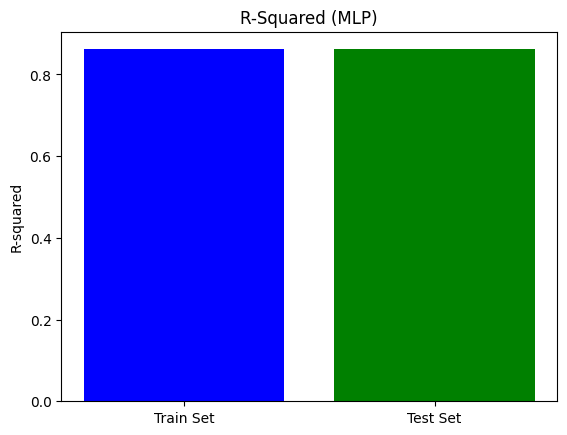

In [37]:
r2_scores = [r2_train_MLP, r2_test_MLP]
labels = ['Train Set', 'Test Set']

plt.bar(labels, r2_scores, color=['blue', 'green'])
plt.title('R-Squared (MLP)')
plt.ylabel('R-squared')
plt.show()

C:\Users\adity\AppData\Local\Temp\ipykernel_6604\833640547.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(models, rotation=45)
C:\Users\adity\AppData\Local\Temp\ipykernel_6604\833640547.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 1].set_xticklabels(models, rotation=45)
C:\Users\adity\AppData\Local\Temp\ipykernel_6604\833640547.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(models, rotation=45)
C:\Users\adity\AppData\Local\Temp\ipykernel_6604\833640547.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(models, rotation=45)


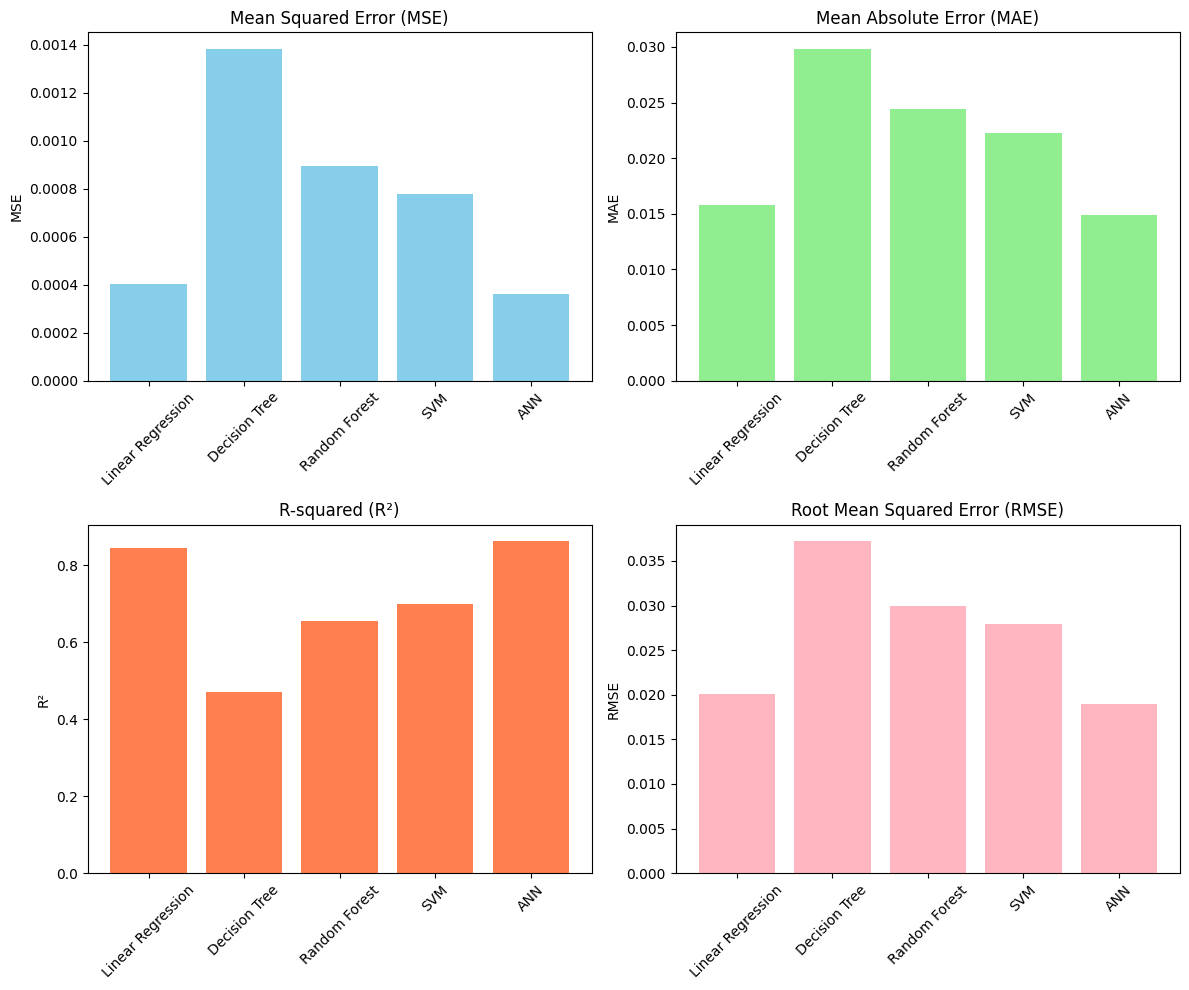

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'SVM', 'ANN']

# Evaluation metrics
mse_values = [mse, mean_squared_error(y_train, y_train_pred), mse_test_RF,  mse_svm, mse_test_MLP]
mae_values = [mae, mean_absolute_error(y_train, y_train_pred), mae_test_RF,  mae_svm, mae_test_MLP]
r2_values = [r2, r2_score(y_train, y_train_pred), r2_test_RF, r2_svm, r2_test_MLP]
rmse_values = [rmse, np.sqrt(mean_squared_error(y_train, y_train_pred)), rmse_test_RF,  rmse_svm, rmse_test_MLP]

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot MSE
axs[0, 0].bar(models, mse_values, color='skyblue')
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].set_xticklabels(models, rotation=45)

# Plot MAE
axs[0, 1].bar(models, mae_values, color='lightgreen')
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')
axs[0, 1].set_xticklabels(models, rotation=45)

# Plot R²
axs[1, 0].bar(models, r2_values, color='coral')
axs[1, 0].set_title('R-squared (R²)')
axs[1, 0].set_ylabel('R²')
axs[1, 0].set_xticklabels(models, rotation=45)

# Plot RMSE
axs[1, 1].bar(models, rmse_values, color='lightpink')
axs[1, 1].set_title('Root Mean Squared Error (RMSE)')
axs[1, 1].set_ylabel('RMSE')
axs[1, 1].set_xticklabels(models, rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


C:\Users\adity\AppData\Local\Temp\ipykernel_6604\2316229660.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')
C:\Users\adity\AppData\Local\Temp\ipykernel_6604\2316229660.py:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')
C:\Users\adity\AppData\Local\Temp\ipykernel_6604\2316229660.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label

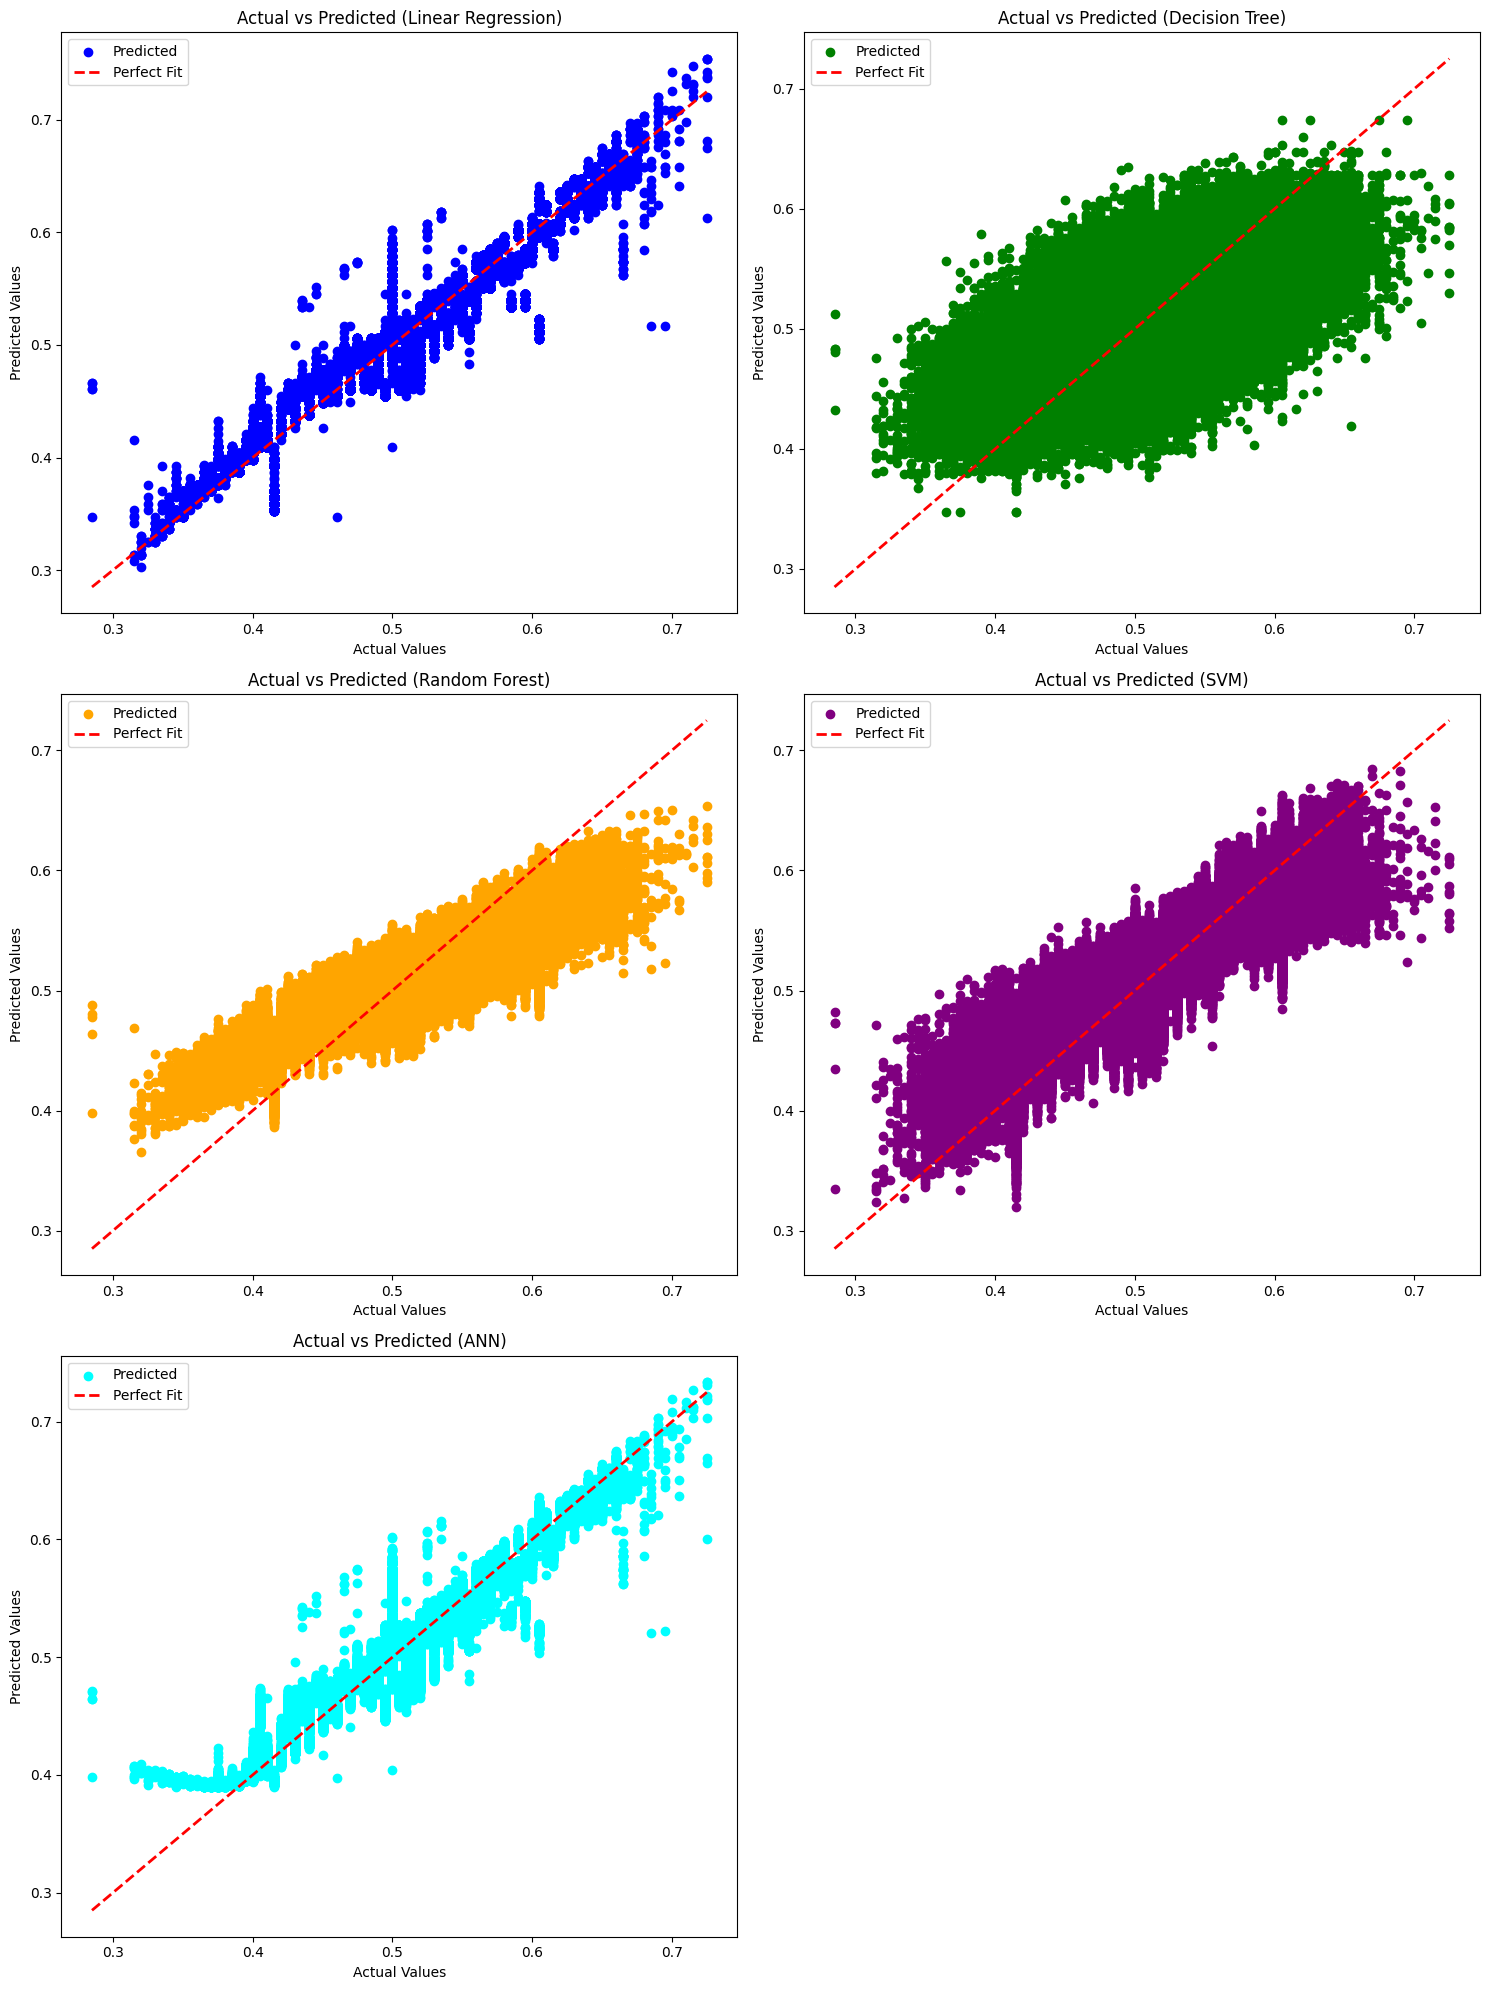

In [41]:
import matplotlib.pyplot as plt

# Create a figure with a specific size
plt.figure(figsize=(15, 20))

# Subplot 1: Linear Regression
plt.subplot(3, 2, 1)
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Linear Regression)')
plt.legend()

# Subplot 2: Decision Tree Regressor
plt.subplot(3, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Decision Tree)')
plt.legend()

# Subplot 3: Random Forest Regressor
plt.subplot(3, 2, 3)
plt.scatter(y_test, y_pred_test_RF, color='orange', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Random Forest)')
plt.legend()

# Subplot 4: Support Vector Machine (SVM)
plt.subplot(3, 2, 4)
plt.scatter(y_test, y_pred_svm, color='purple', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (SVM)')
plt.legend()

# Subplot 5: Artificial Neural Network (ANN)
plt.subplot(3, 2, 5)
plt.scatter(y_test, y_pred_mlp, color='cyan', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, color='red', label='Perfect Fit')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (ANN)')
plt.legend()

# Adjust layout
plt.tight_layout()
plt.show()
